#Análise da assortatividade

Análise de Assortatividade em Grafos de Ingredientes da
Culinária Brasileira




In [ ]:
!pip install nxviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
#importe das bibliotecas necessárias
import networkx as nx
import matplotlib.pyplot as plt
import csv
from itertools import combinations
import nxviz as nv
import matplotlib.pyplot as plt

###Para a realização da atividade foi necessária construir um grafo de co-ocorrência a partir de 50 receitas populares da culinária brasileiro, classificando os ingredientes por tipo (Proteína, Carboidrato, Vegetal, Fruta,Laticínio, Gordura, Condimento, Outro) e analisar a assortatividade do grafo.


###Em primeiro lugar, foi usado um modelo de linguagem (Gemini AI) para dado a imagem da receita ser gerado a descrição dos ingredientes da receita e classificando-os nas categorias descritas anteriormente. Sendo organizando em um arquivo de extensão .csv da seguinte forma:


*   nome_receita
*   ingredientes
* tipo_ingredientes

###Em suma, o grafo foi construído tendo os nós como sendo ingredientes, as arestas, as ligações ente ingredientes que aparecem na mesma receita, e os atributos dos nós, o tipo de ingrediente.

###Percebe-se que a rede contém 89 nós e 473 arestas.



In [ ]:
# --- Definindo o nome do arquivo CSV ---
csv_filename = '/content/drive/MyDrive/AED2/projetos/U1T2/ingredientes.csv'

In [ ]:
# Cria um grafo vazio
G = nx.Graph()

# Dicionário para garantir que o tipo do ingrediente seja consistente
ingredient_types_map = {}

try:
    # --- Leitura do arquivo CSV ---
    # Abre o arquivo especificado no modo leitura ('r') com codificação UTF-8
    with open(csv_filename, 'r', encoding='utf-8') as file_handle:
        # Cria um leitor CSV a partir do handle do arquivo
        reader = csv.reader(file_handle)

        # Pula a linha do cabeçalho
        try:
            header = next(reader)
        except StopIteration:
            print(f"Erro: O arquivo CSV '{csv_filename}' está vazio ou não tem cabeçalho.")
            exit()

        # Processa cada linha (receita) restante no arquivo
        for row in reader:
            if len(row) != 3:
                print(f"Aviso: Pulando linha mal formatada: {row}")
                continue

            nome_receita, ingredientes_str, tipos_str = row

            # Limpa e divide as strings de ingredientes e tipos
            ingredientes = [ing.strip() for ing in ingredientes_str.split(',') if ing.strip()]
            tipos = [t.strip() for t in tipos_str.split(',') if t.strip()]

            if len(ingredientes) != len(tipos):
                print(f"Aviso: Número de ingredientes e tipos não corresponde na receita '{nome_receita}'. Pulando.")
                continue

            # Adiciona nós e armazena/verifica tipos
            for ingrediente, tipo in zip(ingredientes, tipos):
                if ingrediente not in G:
                    G.add_node(ingrediente, type=tipo)
                    ingredient_types_map[ingrediente] = tipo
                elif ingrediente in ingredient_types_map and ingredient_types_map[ingrediente] != tipo:
                     print(f"Aviso: Tipo inconsistente para '{ingrediente}' na receita '{nome_receita}'. "
                           f"Mantendo tipo anterior: '{ingredient_types_map[ingrediente]}'. Novo tipo encontrado: '{tipo}'")

            # Adiciona arestas entre todos os pares de ingredientes da receita
            for ing1, ing2 in combinations(ingredientes, 2):
                 G.add_edge(ing1, ing2)

# --- Tratamento de erro se o arquivo não for encontrado ---
except FileNotFoundError:
    print(f"Erro: O arquivo '{csv_filename}' não foi encontrado.")
    print("Certifique-se de que o arquivo está no mesmo diretório que o script Python,")
    print("ou forneça o caminho completo para o arquivo.")
    exit() # Termina o script se o arquivo não existir

# --- Tratamento para outros erros de leitura ---
except Exception as e:
    print(f"Ocorreu um erro inesperado ao ler o arquivo '{csv_filename}': {e}")
    exit()


# --- Algumas informações sobre a rede
print(f"Número de nós (ingredientes): {G.number_of_nodes()}")
print(f"Número de arestas (coocorrências): {G.number_of_edges()}")

print("\nExemplo de atributos de nós:")
example_nodes = ['Arroz', 'Feijão preto', 'Ovos', 'Mandioca']
for node in example_nodes:
    if node in G:
        print(f" - Nó: {node}, Atributo (type): {G.nodes[node]['type']}")
    else:
        print(f" - Nó: {node} não encontrado no grafo.")

print("\nExemplo de vizinhos (ingredientes relacionados):")
if 'Feijão preto' in G:
    print(f" - Vizinhos de 'Feijão preto': {list(G.neighbors('Feijão preto'))[:5]}...")
if 'Camarão' in G:
    print(f" - Vizinhos de 'Camarão': {list(G.neighbors('Camarão'))[:5]}...")

Número de nós (ingredientes): 89
Número de arestas (coocorrências): 473

Exemplo de atributos de nós:
 - Nó: Arroz, Atributo (type): Carboidrato
 - Nó: Feijão preto, Atributo (type): Leguminosa
 - Nó: Ovos, Atributo (type): Proteína
 - Nó: Mandioca, Atributo (type): Carboidrato

Exemplo de vizinhos (ingredientes relacionados):
 - Vizinhos de 'Feijão preto': ['Carnes de porco', 'Carne seca', 'Cebola', 'Alho', 'Louro']...
 - Vizinhos de 'Camarão': ['Goma de tapioca', 'Jambu', 'Tucupi', 'Alho', 'Sal']...
 - Vizinhos de 'Açúcar': ['Amendoim', 'Sal', 'Milho', 'Leite', 'Leite de coco']...


#Cálculo da Assortatividade

###Com o grafo construido, realizou-se a analise da assortatividade com base em como os ingredientes são classificados. Verificou-se que o coeficiente de assortatividade sendo um valor negativo (-0.0556), isso indica heterofilia na rede, ou seja, na gastronomia brasileira há uma preferência por valorizar combinações entre ingredientes de tipos diferentes. Este é um resultado bastante esperado para receitas culinárias, pois um prato equilibrado e completo geralmente requer a combinação de diferentes tipos de componentes.

###E com relação a visualização do grafo, observa-se que as linhas conectando os pontos (ingredientes) cruzam bastante o centro, sendo grossas e densas,ligando diferentes seções coloridas (categorias). Isso reforça visualmente a heterofilia do coeficiente de assortatividade.  Por exemplo, há muitas conexões entre "Proteína" e "Vegetal", "Proteína" e "Carboidrato".

In [ ]:
# Calcula o coeficiente de assortatividade por tipo
assortativity_coefficient = nx.attribute_assortativity_coefficient(G, "type")
print(f"Coeficiente de Assortatividade por Tipo: {assortativity_coefficient: .4f}")



Coeficiente de Assortatividade por Tipo: -0.0556


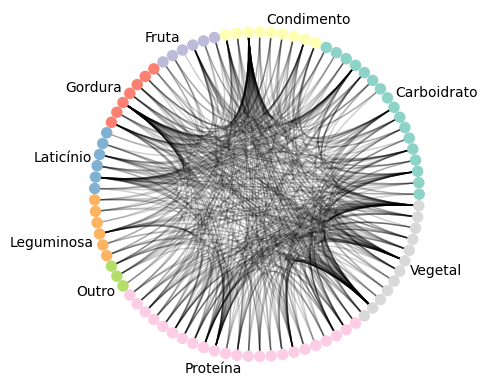

In [ ]:
import matplotlib.pyplot as plt
from nxviz import annotate, highlights

ax = nv.circos(G,
               group_by="type",
               node_color_by="type"
)
annotate.circos_group(G, group_by="type")

# Save figure
plt.savefig("assortativity.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()